In [1]:
import numpy as np

In [2]:
import pandas as pd

#Data processing
patients = pd.read_csv('patients.csv')
diagnosis = pd.read_csv('diagnoses.csv')
outcomes = pd.read_csv('outcomes.csv')
labs = pd.read_csv('labs.csv')

In [3]:
patients = patients.merge(diagnosis, on = 'DiagnosisID')
patients = patients.merge(outcomes, on = 'OutcomeID')

In [4]:
patients['AdmissionDate'] = pd.to_datetime(patients['AdmissionDate'])
patients['DischargeDate'] = pd.to_datetime(patients['DischargeDate'])
patients['LengthOfstay'] = (patients['DischargeDate'] - patients['AdmissionDate']).dt.days

In [5]:
patients['OutcomeEncoded'] = patients['OutcomeName'].map({'Recovered' : 0, 'Complicated' : 1, 'Deceased' : 1})

In [6]:
patients['HighRisk'] = np.where((patients['Age']> 65) | (patients['OutcomeName'].isin(['Complicated', 'Deceased'])),1,0)

In [7]:
abnormal_conditions = {
    'Blood Sugar': lambda x: x>120,
    'Cholestrol': lambda x: x>200,
    'Hemoglobin': lambda x: x<13
}

def count_abnormal_labs(patient_id):
    patient_labs = labs[labs['PatientID'] == patient_id]
    count = 0
    for test_name, condition in abnormal_conditions.items():
        test_results = patient_labs[patient_labs['TestName'] == test_name]
        count += test_results['Result'].apply(condition).sum()
    return count

patients['AbnormalLabCount'] = patients['PatientID'].apply(count_abnormal_labs)

Model Training

In [22]:
features = patients[['Age', 'LengthOfstay', 'TreatmentCost']]
target = patients['OutcomeEncoded']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42) 

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.72      1.00      0.83        43

    accuracy                           0.72        60
   macro avg       0.36      0.50      0.42        60
weighted avg       0.51      0.72      0.60        60



c:\Users\ARYAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ARYAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ARYAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Curve

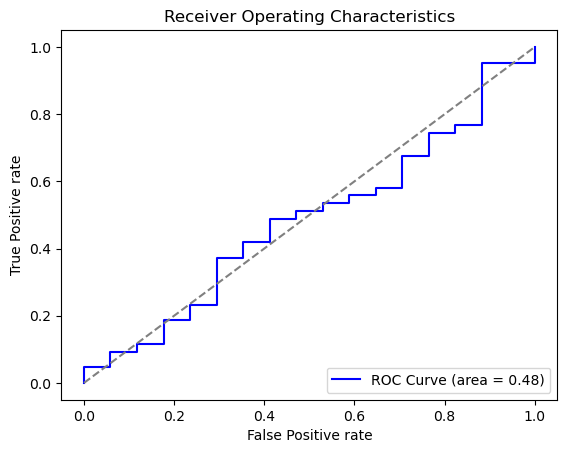

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_prob)
roc_auc = auc(fpr,tpr)


plt.figure()
plt.plot(fpr,tpr,color = 'blue', label = f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color = 'grey', linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

In [27]:
import joblib
joblib.dump(model, 'Risk_model1.pkl')

['Risk_model1.pkl']

In [17]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
